In [1]:
import os
os.chdir('/storage/drive_2/xinhao/201C_TLB_Optimizations') 
import cache_model.plots
l1_tlb_missrate_global, l2_tlb_missrate_global, l1_tlb_missrate_by_workload, l2_tlb_missrate_by_workload, l1_tlb_missrate_by_num_lanes, l2_tlb_missrate_by_num_lanes, l1_tlb_missrate_by_page_size, l2_tlb_missrate_by_page_size = cache_model.plots.data_post_processing()

***Started Data Loading***
extracting file: design_1_2097152_npb_cffts1_128_128_128_8
mem_access_num: 51
ptw_pool_missrate: 0.33333333332679743
l2_tlb_missrate: 0.010216346153840015
l1_tlb_missrate: 1.1668485753683483e-05
extracting file: design_4_4096_stream_add_128_10000000_8
mem_access_num: 65939
l1_pte_cache_missrate: 1.7066011331831234e-05
l2_pte_cache_missrate: 0.0002559901699774685
l3_pte_cache_missrate: 0.12504266502832745
ptw_pool_missrate: 0.999999999999983
l2_tlb_missrate: 0.999999999999983
address_coalescer_missrate: 0.007812499999999999
l1_tlb_missrate: 0.25000960000000005
extracting file: design_1_4096_stream_copy_128_10000000_8
mem_access_num: 156256
ptw_pool_missrate: 0.24999999999999842
l2_tlb_missrate: 0.007812499999999998
l1_tlb_missrate: 0.25000960000000005
extracting file: design_4_2097152_stream_copy_8_10000000_8
mem_access_num: 88
l1_pte_cache_missrate: 0.012987012986844324
l2_pte_cache_missrate: 0.12987012986844323
l3_pte_cache_missrate: 0.0
ptw_pool_missrate: 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np

l1_tlb_missrate_annotation = ['{:.2f}'.format(i) for i in l1_tlb_missrate_global]
l2_tlb_missrate_annotation = ['{:.2f}'.format(i) for i in l2_tlb_missrate_global]
l1_tlb_missrate_by_workload_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l1_tlb_missrate_by_workload]
l2_tlb_missrate_by_workload_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l2_tlb_missrate_by_workload]
l1_tlb_missrate_by_num_lanes_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l1_tlb_missrate_by_num_lanes]
l2_tlb_missrate_by_num_lanes_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l2_tlb_missrate_by_num_lanes]
l1_tlb_missrate_by_page_size_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l1_tlb_missrate_by_page_size]
l2_tlb_missrate_by_page_size_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l2_tlb_missrate_by_page_size]

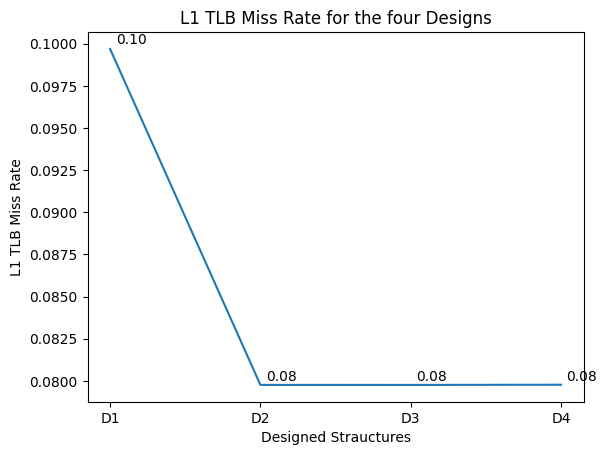

In [3]:
l1_tlb_missrate_global = np.array(l1_tlb_missrate_global, dtype=float)
fig1 = plt.figure()
x = np.linspace(1, 4, num=4, endpoint=False)
x_name = ['D1', 'D2', 'D3', 'D4']
plt.xlabel("Designed Strauctures")
plt.xticks(x, x_name)
plt.ylabel("L1 TLB Miss Rate")
# plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
for i, j in zip(x, l1_tlb_missrate_annotation):
    plt.annotate(str(j), xy=(i, float(j)), xytext=(4, 0), textcoords='offset points')
# plt.ylim(1, 0)
plt.plot(x, l1_tlb_missrate_global)
plt.title('L1 TLB Miss Rate for the four Designs')
plt.savefig('figures/L1 TLB Miss Rate.png')

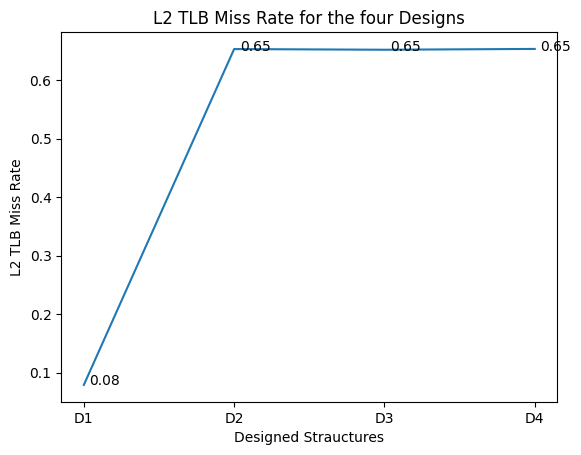

In [4]:
l2_tlb_missrate_global = np.array(l2_tlb_missrate_global, dtype=float)
fig2 = plt.figure()
x = np.linspace(1, 4, num=4, endpoint=False)
x_name = ['D1', 'D2', 'D3', 'D4']
plt.xlabel("Designed Strauctures")
plt.xticks(x, x_name)
plt.ylabel("L2 TLB Miss Rate")
# plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
for i, j in zip(x, l2_tlb_missrate_annotation):
    plt.annotate(str(j), xy=(i, float(j)), xytext=(4, 0), textcoords='offset points')
# plt.ylim(0, 1)
plt.plot(x, l2_tlb_missrate_global)
plt.title('L2 TLB Miss Rate for the four Designs')
plt.savefig('figures/L2 TLB Miss Rate.png')

/tmp/ipykernel_786294/3887010200.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


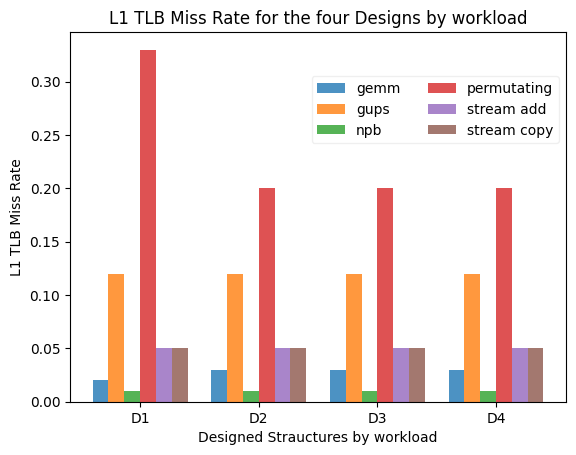

In [5]:
l1_tlb_missrate_by_workload_annotation_T = list(zip(*l1_tlb_missrate_by_workload_annotation))
l1_tlb_missrate_by_workload_annotation_T = np.array(l1_tlb_missrate_by_workload_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
workload_name = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']


fig3, ax = plt.subplots()
for i in range(len(workload_name)):
    bars = ax.bar(x + (i * bar_width), l1_tlb_missrate_by_workload_annotation_T[i], bar_width, alpha=0.8, label=workload_name[i])

ax.set_xlabel('Designed Strauctures by workload')
ax.set_ylabel('L1 TLB Miss Rate')
ax.set_title('L1 TLB Miss Rate for the four Designs by workload')
ax.set_xticks(x + (bar_width * (len(workload_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig3.show()
fig3.savefig('figures/L1 TLB Miss Rate by workload.png')

/tmp/ipykernel_786294/139859757.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


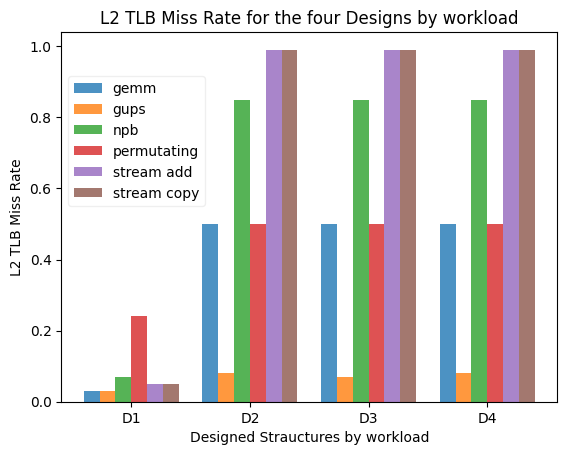

In [6]:
l2_tlb_missrate_by_workload_annotation_T = list(zip(*l2_tlb_missrate_by_workload_annotation))
l2_tlb_missrate_by_workload_annotation_T = np.array(l2_tlb_missrate_by_workload_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
workload_name = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']

fig4, ax = plt.subplots()
for i in range(len(workload_name)):
    bars = ax.bar(x + (i * bar_width), l2_tlb_missrate_by_workload_annotation_T[i], bar_width, alpha=0.8, label=workload_name[i])

ax.set_xlabel('Designed Strauctures by workload')
ax.set_ylabel('L2 TLB Miss Rate')
ax.set_title('L2 TLB Miss Rate for the four Designs by workload')
ax.set_xticks(x + (bar_width * (len(workload_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='upper left', ncol=1, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig4.show()
fig4.savefig('figures/L2 TLB Miss Rate by workload.png')

/tmp/ipykernel_786294/3566793764.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig5.show()


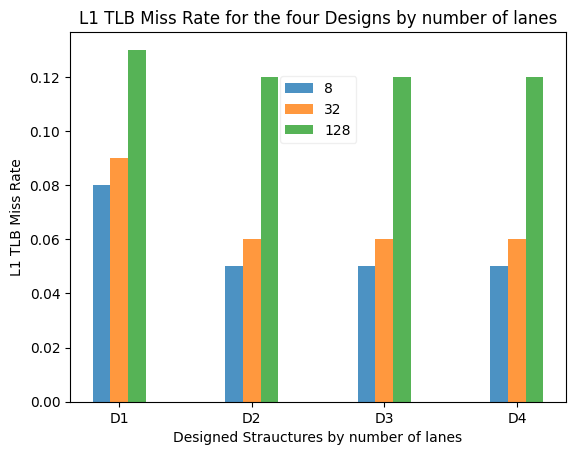

In [7]:
l1_tlb_missrate_by_num_lanes_annotation_T = list(zip(*l1_tlb_missrate_by_num_lanes_annotation))
l1_tlb_missrate_by_num_lanes_annotation_T = np.array(l1_tlb_missrate_by_num_lanes_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
num_lane_name = ['8', '32', '128']

fig5, ax = plt.subplots()
for i in range(len(num_lane_name)):
    bars = ax.bar(x + (i * bar_width), l1_tlb_missrate_by_num_lanes_annotation_T[i], bar_width, alpha=0.8, label=num_lane_name[i])

ax.set_xlabel('Designed Strauctures by number of lanes')
ax.set_ylabel('L1 TLB Miss Rate')
ax.set_title('L1 TLB Miss Rate for the four Designs by number of lanes')
ax.set_xticks(x + (bar_width * (len(num_lane_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig5.show()
fig5.savefig('figures/L1 TLB Miss Rate by number of lanes.png')

/tmp/ipykernel_786294/198406789.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig6.show()


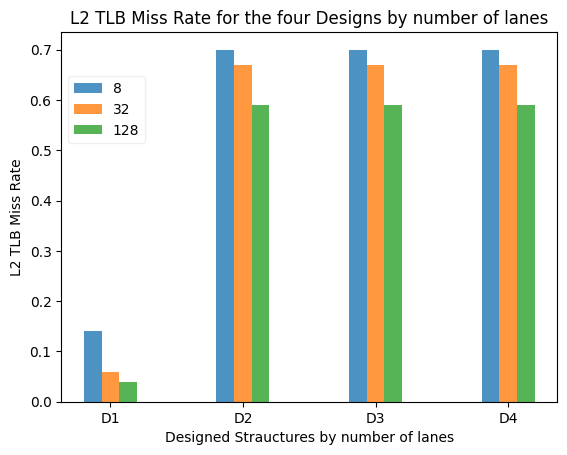

In [8]:
l2_tlb_missrate_by_num_lanes_annotation_T = list(zip(*l2_tlb_missrate_by_num_lanes_annotation))
l2_tlb_missrate_by_num_lanes_annotation_T = np.array(l2_tlb_missrate_by_num_lanes_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
num_lane_name = ['8', '32', '128']

fig6, ax = plt.subplots()
for i in range(len(num_lane_name)):
    bars = ax.bar(x + (i * bar_width), l2_tlb_missrate_by_num_lanes_annotation_T[i], bar_width, alpha=0.8, label=num_lane_name[i])

ax.set_xlabel('Designed Strauctures by number of lanes')
ax.set_ylabel('L2 TLB Miss Rate')
ax.set_title('L2 TLB Miss Rate for the four Designs by number of lanes')
ax.set_xticks(x + (bar_width * (len(num_lane_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='best', ncol=1, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig6.show()
fig6.savefig('figures/L2 TLB Miss Rate by number of lanes.png')

/tmp/ipykernel_786294/3537793407.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig7.show()


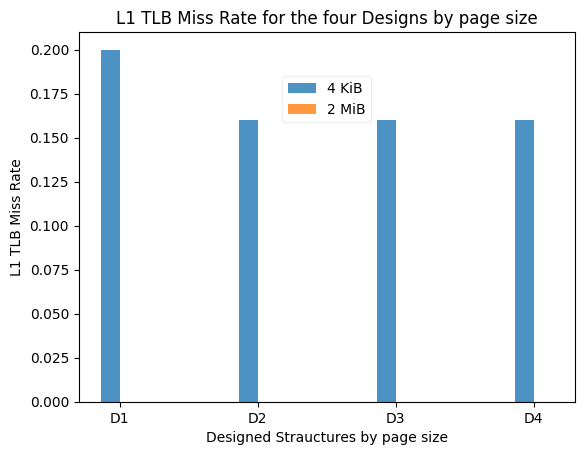

In [9]:
l1_tlb_missrate_by_page_size_annotation_T = list(zip(*l1_tlb_missrate_by_page_size_annotation))
l1_tlb_missrate_by_page_size_annotation_T = np.array(l1_tlb_missrate_by_page_size_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
num_lane_name = ['4 KiB', '2 MiB']

fig7, ax = plt.subplots()
for i in range(len(num_lane_name)):
    bars = ax.bar(x + (i * bar_width), l1_tlb_missrate_by_page_size_annotation_T[i], bar_width, alpha=0.8, label=num_lane_name[i])

ax.set_xlabel('Designed Strauctures by page size')
ax.set_ylabel('L1 TLB Miss Rate')
ax.set_title('L1 TLB Miss Rate for the four Designs by page size')
ax.set_xticks(x + (bar_width * (len(num_lane_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig7.show()
fig7.savefig('figures/L1 TLB Miss Rate by page size.png')

/tmp/ipykernel_786294/2585692421.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig8.show()


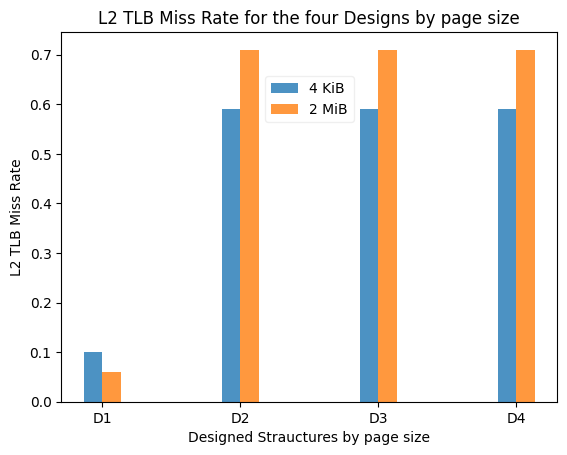

In [10]:
l2_tlb_missrate_by_page_size_annotation_T = list(zip(*l2_tlb_missrate_by_page_size_annotation))
l2_tlb_missrate_by_page_size_annotation_T = np.array(l2_tlb_missrate_by_page_size_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
num_lane_name = ['4 KiB', '2 MiB']

fig8, ax = plt.subplots()
for i in range(len(num_lane_name)):
    bars = ax.bar(x + (i * bar_width), l2_tlb_missrate_by_page_size_annotation_T[i], bar_width, alpha=0.8, label=num_lane_name[i])

ax.set_xlabel('Designed Strauctures by page size')
ax.set_ylabel('L2 TLB Miss Rate')
ax.set_title('L2 TLB Miss Rate for the four Designs by page size')
ax.set_xticks(x + (bar_width * (len(num_lane_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig8.show()
fig8.savefig('figures/L2 TLB Miss Rate by page size.png')